In [1]:
import numpy as np
import os

np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'decision_trees'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving figure: ', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training and visualizing

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [8]:
# X

In [10]:
# y

In [40]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [41]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [42]:
export_graphviz(tree_clf, out_file=os.path.join(IMAGES_PATH, 'iris_tree.dot'),
feature_names=iris.feature_names[2:], class_names=iris.target_names,
rounded=True, filled=True)

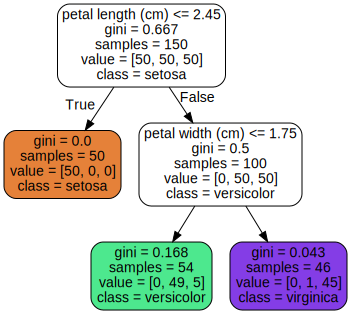

In [44]:
Source.from_file(os.path.join(IMAGES_PATH, 'iris_tree.dot'))

In [45]:
# !dot -Tpng iris_tree.dot -o iris_tree.png

Error: dot: can't open iris_tree.dot


In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.xlabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

Saving figure:  decision_tree_decision_boundries_plot


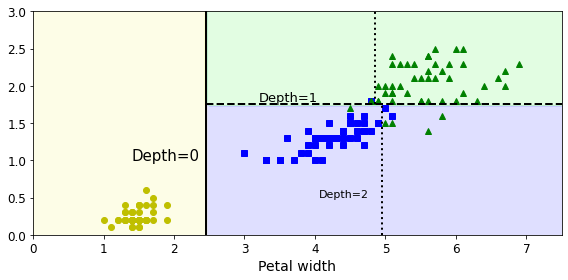

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)

plt.text(1.4, 1, 'Depth=0', fontsize=15)
plt.text(3.2, 1.8, 'Depth=1', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', fontsize=11)

save_fig('decision_tree_decision_boundries_plot')
plt.show()

## Predicting classes and class probabilities

In [22]:
# predicting the probability of each class
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [23]:
# predicting the actual class
tree_clf.predict([[5, 1.5]])

array([1])

## Sensitivity to training set details

### removing the specific outlier entry and retraining the model

In [26]:
# widest Iris versicolor flower
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [27]:
not_widest_versicolor = (X[:, 1] != 1.8) | (y==2)

In [29]:
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

In [30]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=42)

Saving figure:  decision_tree_instability_plot


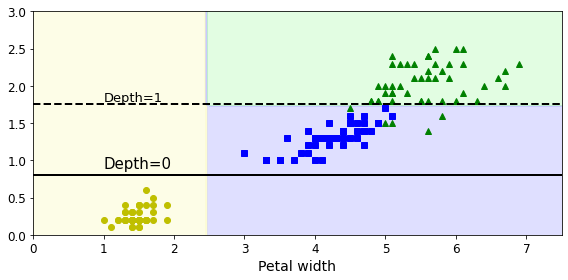

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'Depth=0', fontsize=15)
plt.text(1.0, 1.8, 'Depth=1', fontsize=13)

save_fig('decision_tree_instability_plot')
plt.show()


In [32]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=42)

In [33]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

Saving figure:  min_samples_leaf_plot


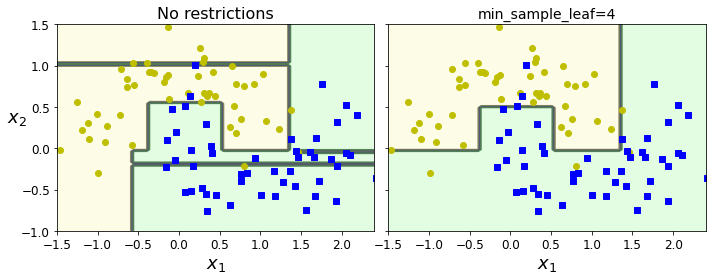

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])

plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('No restrictions', fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title(f'min_sample_leaf={deep_tree_clf2.min_samples_leaf}', fontsize=14)
plt.ylabel("")

save_fig('min_samples_leaf_plot')
plt.show()

In [36]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

DecisionTreeClassifier(random_state=42)

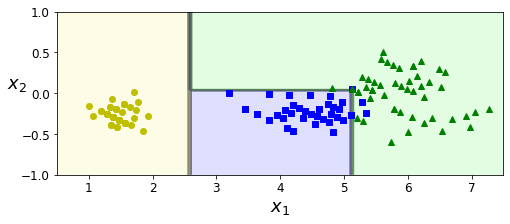

In [37]:
plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()